In [1]:
import os
import time

import tensorflow as tf
import tensorflow_probability as tfp

import numpy as np

import pandas as pd
import geopandas as gp

2024-11-08 10:06:18.426903: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-08 10:06:19.041007: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-08 10:06:19.041028: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-08 10:06:19.043065: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-08 10:06:19.220309: I tensorflow/core/platform/cpu_feature_g

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set font properties for ticks
plt.rcParams['xtick.labelsize'] = 12  # Font size of x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # Font size of y-axis tick labels

# Set font properties for labels
plt.rcParams['axes.labelsize'] = 15  # Font size of axis labels

# Set font properties for title
plt.rcParams['axes.titlesize'] = 17  # Font size of titlea

# Foot and mouth data

In [3]:
pd.read_csv("Data/FM/raw/fmd2001_extract.csv").head()

,cph,easting,northing,cattle,pigs,sheep,goats,deer
0,41/66/233,565800,117100,0,0,29,0,0
1,41/66/235,565200,114700,12,0,0,0,0
2,41/66/237,562925,117817,94,0,160,0,0
3,41/66/238,564000,120000,0,0,351,0,0
4,41/66/244,564717,117295,13,2,55,0,0


In [4]:
farms = pd.read_csv("Data/FM/raw/fmd2001_extract.csv")
farms.drop(["pigs", "goats", "deer"], axis = 1, inplace = True)

labels = np.cast["int64"](np.linspace(0, farms[["cph"]].count(axis=0)[0]-1, farms[["cph"]].count(axis=0)[0]))
farms["labels"] = labels

farms_labels = farms[["cph","labels", "easting", "northing"]]


states = pd.read_csv("Data/FM/raw/fmd2001_ips.csv")
states.drop(["i"], axis = 1, inplace = True)

states_with_labels = pd.merge(farms_labels, states, on = "cph", how = "inner")

farms_with_labels = farms

states_with_labels.drop("cph", axis =1, inplace = True)
farms_with_labels.drop("cph", axis =1, inplace = True)

farms_with_labels_complete = farms_with_labels
states_with_labels_complete = states_with_labels

/tmp/ipykernel_72358/2425269002.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = np.cast["int64"](np.linspace(0, farms[["cph"]].count(axis=0)[0]-1, farms[["cph"]].count(axis=0)[0]))
/tmp/ipykernel_72358/2425269002.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = np.cast["int64"](np.linspace(0, farms[["cph"]].count(axis=0)[0]-1, farms[["cph"]].count(axis=0)[0]))


In [5]:
# Set font properties for ticks
plt.rcParams['xtick.labelsize'] = 12  # Font size of x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # Font size of y-axis tick labels

# Set font properties for labels
plt.rcParams['axes.labelsize'] = 15  # Font size of axis labels

# Set font properties for title
plt.rcParams['axes.titlesize'] = 17  # Font size of titlea

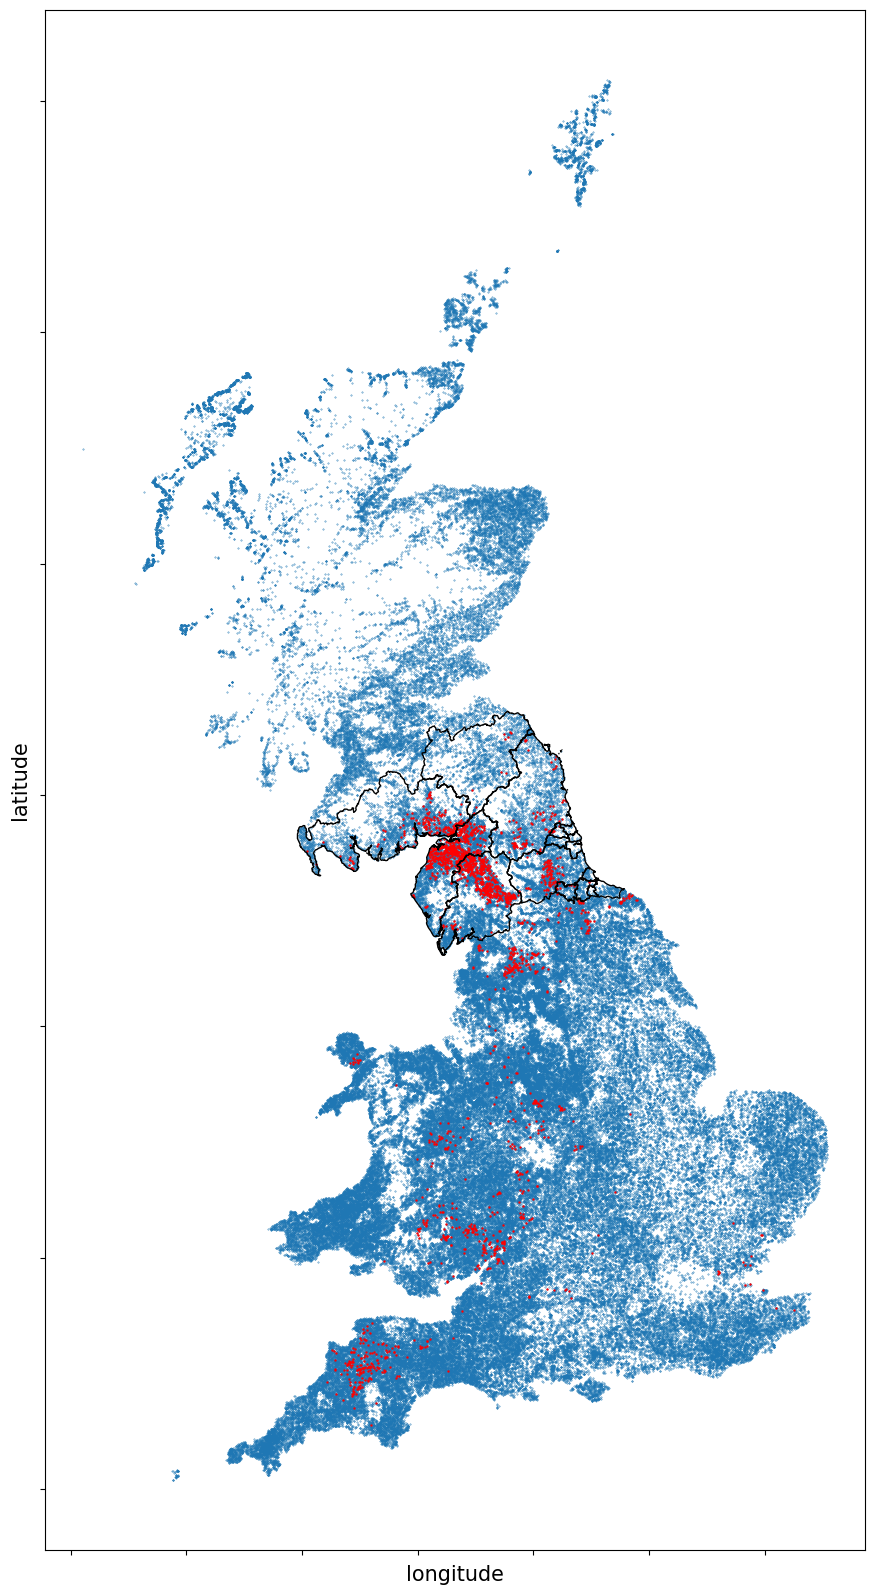

In [6]:
geo = gp.GeoDataFrame(data = farms_with_labels, geometry = gp.points_from_xy(farms_with_labels["easting"],farms_with_labels["northing"]), crs="EPSG:27700")

geo_complete = gp.GeoDataFrame(data = farms_with_labels_complete, geometry = gp.points_from_xy(farms_with_labels_complete["easting"],farms_with_labels_complete["northing"]), crs="EPSG:27700")
geo_states_complete = gp.GeoDataFrame(data = states_with_labels_complete, geometry = gp.points_from_xy(states_with_labels_complete["easting"],states_with_labels_complete["northing"]), crs="EPSG:27700")
geo = gp.GeoDataFrame(data = farms_with_labels, geometry = gp.points_from_xy(farms_with_labels["easting"],farms_with_labels["northing"]), crs="EPSG:27700")
geo_states = gp.GeoDataFrame(data = states_with_labels, geometry = gp.points_from_xy(states_with_labels["easting"],states_with_labels["northing"]), crs="EPSG:27700")

geo_counties = gp.read_file('Data/FM/raw/utla2024.geojson')
geo_counties = geo_counties.to_crs(epsg=27700)
geo_counties['geometry'] = geo_counties['geometry'].buffer(0)
geo_counties['geometry'] = geo_counties['geometry'].simplify(tolerance=.0001, preserve_topology=True)


# Get the bounds of each polygon (minx, miny, maxx, maxy)
gdf_bounds = geo_counties.bounds
condition_1 = gdf_bounds['maxy'] > 680000
# Filter the GeoDataFrame to keep polygons whose maximum latitude is below the threshold
geo_counties = geo_counties[~condition_1]

# Get the bounds of each polygon (minx, miny, maxx, maxy)
gdf_bounds = geo_counties.bounds
condition_2 = np.all(np.stack((gdf_bounds['maxy'] > 600000, gdf_bounds['maxx'] < 320000), axis = 1), axis = 1)
# Filter the GeoDataFrame to keep polygons whose maximum latitude is below the threshold
geo_counties = geo_counties[~condition_2]

# Get the bounds of each polygon (minx, miny, maxx, maxy)
gdf_bounds = geo_counties.bounds
condition_3 = np.all(np.stack((gdf_bounds['miny'] > 600000, gdf_bounds['maxx'] < 380000), axis = 1), axis = 1)
# Filter the GeoDataFrame to keep polygons whose maximum latitude is below the threshold
geo_counties = geo_counties[~condition_3]

# Get the bounds of each polygon (minx, miny, maxx, maxy)
gdf_bounds = geo_counties.bounds
condition_4 = gdf_bounds['miny'] > 430000
# Filter the GeoDataFrame to keep polygons whose maximum latitude is below the threshold
geo_counties = geo_counties[condition_4]

# Get the bounds of each polygon (minx, miny, maxx, maxy)
gdf_bounds = geo_counties.bounds
condition_5 = gdf_bounds['miny'] > 445000
# Filter the GeoDataFrame to keep polygons whose maximum latitude is below the threshold
geo_counties = geo_counties[condition_5]

fig, (ax) = plt.subplots(1, 1, figsize=(20, 20), dpi=100)

ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

ax.scatter(np.array(geo_complete.get_coordinates()["x"]), np.array(geo_complete.get_coordinates()["y"]), s=0.1)

ax.scatter(np.array(geo_states_complete.get_coordinates()["x"]), np.array(geo_states_complete.get_coordinates()["y"]), s=0.5, color = "red")

geo_counties.plot(ax = ax, color = "none", edgecolor='black')


plt.savefig('Figures/FM_UK_cumbria.png', format='png', dpi=50, bbox_inches='tight')

In [7]:
# Initialize the result matrix
result_matrix = np.zeros((len(geo_complete), len(geo_counties)), dtype=bool)

# Populate the matrix by checking if points are within each polygon
for i, poly in enumerate(geo_counties.geometry):
    result_matrix[:, i] = geo_complete.within(poly)

geo_complete = geo_complete.drop(index=np.where(np.sum(result_matrix, axis = 1)<1)[0]).reset_index(drop=True)

In [8]:
# Initialize the result matrix
result_matrix_states = np.zeros((len(geo_states_complete), len(geo_counties)), dtype=bool)

# Populate the matrix by checking if points are within each polygon
for i, poly in enumerate(geo_counties.geometry):
    result_matrix_states[:, i] = geo_states_complete.within(poly)

geo_states_complete = geo_states_complete.drop(index=np.where(np.sum(result_matrix_states, axis = 1)<1)[0]).reset_index(drop=True)

In [9]:
# fig, (ax) = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

# ax.set_ylabel('latitude')
# ax.set_xlabel('longitude')
# ax.set_xlim(367100-10000, 367100+10000)
# ax.set_ylim(204500-10000, 204500+10000)

# ax.scatter(np.array(geo_complete.get_coordinates()["x"]), np.array(geo_complete.get_coordinates()["y"]), s=1)

# ax.scatter(np.array(geo_states_complete.get_coordinates()["x"]), np.array(geo_states_complete.get_coordinates()["y"]), s=5, color = "red")

# geo_counties.plot(ax = ax, color = "none", edgecolor='black')

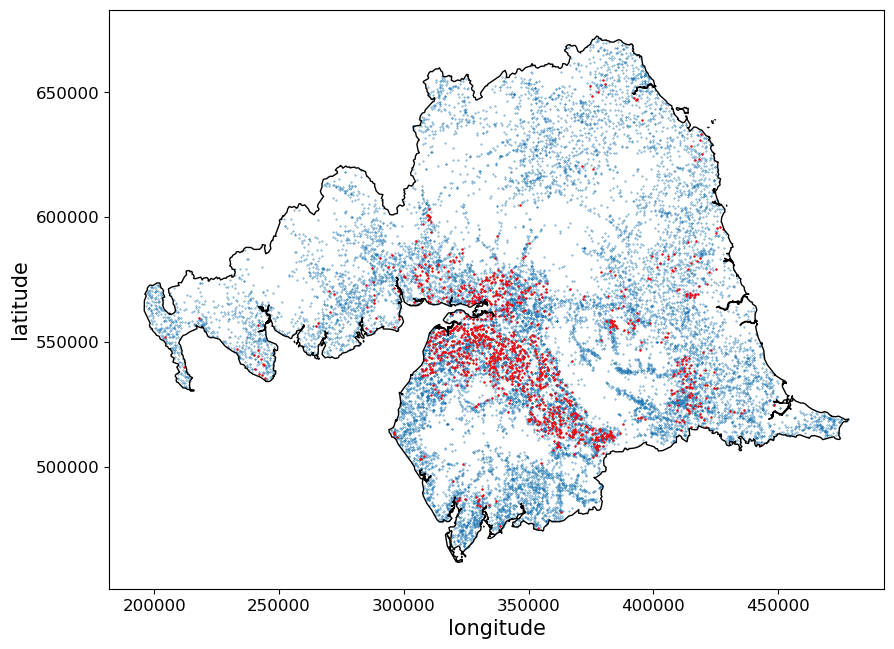

In [10]:
from shapely.ops import unary_union

fig, (ax) = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

ax.scatter(np.array(geo_complete.get_coordinates()["x"]), np.array(geo_complete.get_coordinates()["y"]), s=0.1)

ax.scatter(np.array(geo_states_complete.get_coordinates()["x"]), np.array(geo_states_complete.get_coordinates()["y"]), s=0.5, color = "red")


gp.GeoDataFrame({ 'geometry': [unary_union(geo_counties.geometry)] }, crs=geo_counties.crs).plot(ax = ax, color = "none", edgecolor='black')


plt.savefig('Figures/FM_cumbria.png', format='png', dpi=50)

In [11]:
condition = geo_states_complete["n"]>geo_states_complete["r"]
removed  = geo_states_complete.loc[condition, "r"]
notified = geo_states_complete.loc[condition, "n"]
geo_states_complete.loc[condition, "r"] = notified
geo_states_complete.loc[condition, "n"] = removed

In [12]:
geo_states_complete["r"] = geo_states_complete["r"] + 1

In [13]:
labels = np.cast["int64"](np.linspace(0, geo_complete["labels"].count()-1, geo_complete["labels"].count()))
geo_complete["newlabels"] = labels

geo_states_complete = pd.merge(geo_complete[["labels","newlabels"]], geo_states_complete, on = "labels", how = "inner")

In [14]:
tmax = geo_states_complete[["r", "n"]].max().max()
tmin = geo_states_complete[["r", "n"]].min().min()
smax = geo_complete["newlabels"].max()

notified = geo_states_complete[["newlabels", "n"]]
removed  = geo_states_complete[["newlabels", "r"]]

In [15]:
Y_n_sparse = tf.sparse.SparseTensor(notified.values, np.ones(notified.values.shape[0]), dense_shape = [smax+1, tmax+1])
Y_r_sparse = tf.sparse.SparseTensor(removed.values , np.ones(notified.values.shape[0]), dense_shape = [smax+1, tmax+1])

2024-11-08 10:06:39.527417: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-08 10:06:40.480073: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-08 10:06:40.480143: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-08 10:06:40.496633: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-08 10:06:40.496677: I tensorflow/compile

In [ ]:
radius = 50

neighbours_list = []
distance_list   = [] 
for i in range(geo_complete["newlabels"].count()):
	euclidean_distances = np.sqrt(np.square((geo_complete[["easting", "northing"]].values[i,0] - geo_complete[["easting", "northing"]].values[:,0])/1000) + np.square((geo_complete[["easting", "northing"]].values[i,1] - geo_complete[["easting", "northing"]].values[:,1])/1000))
	index = np.where(euclidean_distances<radius)

	neighbours = geo_complete["newlabels"].loc[index].values
	condition  = neighbours!=i
	neighbours = neighbours[condition]
	distances  = euclidean_distances[index][condition]

	neighbours_list.append(neighbours)
	distance_list.append(distances)

In [17]:
geo_complete["distances"]  = distance_list
geo_complete["neighbours"] = neighbours_list

In [18]:
index_list = []
values_list = []
for label in geo_complete["newlabels"]:

	neighbours = geo_complete.loc[geo_complete["newlabels"]==label]["neighbours"].values[0].reshape(-1,1)

	index_list.append(np.concatenate((label*np.ones(neighbours.shape), neighbours), axis = 1))
	values_list.append(geo_complete.loc[geo_complete["newlabels"]==label]["distances"][label])

In [19]:
indexes = np.concatenate(index_list, axis = 0)
values  = np.concatenate(values_list, axis = 0)

np.save("Data/FM/indexes_FM_cumbria_radius50.npy", indexes)
np.save("Data/FM/values_FM_cumbria_radius50.npy", values)

# Data setup for SINR

In [24]:
# Y_n_dense = tf.cast(tf.transpose(tf.sparse.to_dense(Y_n_sparse)), tf.int32)

# Y = 3*Y_n_dense
# Y = tf.one_hot(Y, tf.cast(5, tf.int32))[20:,...]

# np.save("Data/FM/Y_FM_cumbria.npy", Y)

Y = tf.convert_to_tensor(np.load("Data/FM/Y_FM_cumbria.npy"), dtype = tf.float32)

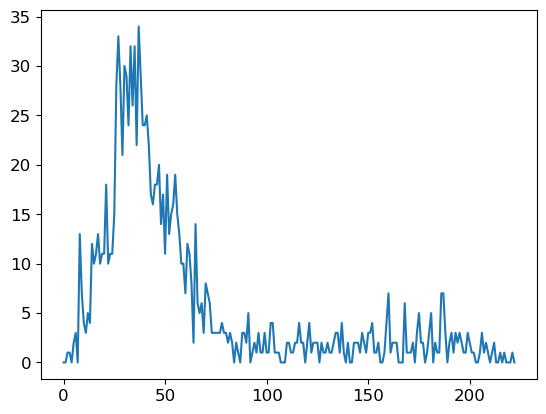

In [25]:
plt.plot(tf.reduce_sum(Y, axis = 1)[...,3])

### Inference

In [26]:
os.chdir("Scripts/")
%run -i FM_model.py
%run -i CAL.py
os.chdir("../")

In [28]:
	indexes = tf.convert_to_tensor(np.load("Data/FM/indexes_FM_cumbria_radius50.npy"), dtype = tf.int64)
	values  = tf.convert_to_tensor(np.load("Data/FM/values_FM_cumbria_radius50.npy"), dtype = tf.float32)
	covariates = tf.convert_to_tensor(np.load("Data/FM/covariates_FM_cumbria.npy"), dtype = tf.float32)

	Y = tf.convert_to_tensor(np.load("Data/FM/Y_FM_cumbria.npy"), dtype = tf.float32)

	batch_size = 5000

	parameters = {"log_tau":tf.convert_to_tensor([np.log(40)], dtype = tf.float32),
	        "log_delta":tf.convert_to_tensor([np.log(0.001)], dtype = tf.float32),
		"log_zeta":tf.convert_to_tensor([np.log(100)], dtype = tf.float32),
		"log_xi":tf.convert_to_tensor([np.log(10.0)], dtype = tf.float32),
		"log_chi":tf.convert_to_tensor([np.log(0.6)], dtype = tf.float32),
		"log_psi":tf.Variable(tf.convert_to_tensor([np.log(2.0)], dtype = tf.float32)),
		"log_gamma":tf.convert_to_tensor([np.log(0.25)], dtype = tf.float32),
		"log_epsilon":tf.convert_to_tensor([np.log(0.0001)], dtype = tf.float32),
		"logit_prob_testing":logit(tf.convert_to_tensor([0.0, 0.0, 1.0, 0.0], dtype = tf.float32)),}
	
	FM_ibm = sparse_FM_SINR(values, indexes, covariates)

	start = time.time()
	loss = CAL_loss(FM_ibm, parameters, Y)
	print(time.time()-start)

	start = time.time()
	loss = CAL_compiled(FM_ibm, parameters, Y)
	print(time.time()-start)

: 

In [ ]:
	n_gradient_steps = 500

	par_to_upd = {"log_tau":tf.convert_to_tensor([np.log(40)], dtype = tf.float32),
		"log_delta":tf.convert_to_tensor([np.log(0.001)], dtype = tf.float32),
		"log_zeta":tf.convert_to_tensor([np.log(100)], dtype = tf.float32),
		"log_xi":tf.convert_to_tensor([np.log(10.0)], dtype = tf.float32),
		"log_chi":tf.convert_to_tensor([np.log(0.6)], dtype = tf.float32),
		"log_psi":tf.convert_to_tensor([np.log(2.0)], dtype = tf.float32),
		"log_gamma":tf.convert_to_tensor([np.log(0.25)], dtype = tf.float32),
		"log_epsilon":tf.convert_to_tensor([np.log(0.0001)], dtype = tf.float32),
		"logit_prob_testing":logit(tf.convert_to_tensor([0.0, 0.0, 1.0, 0.0], dtype = tf.float32)),}

	learning_parameters = {"log_tau":1, "log_delta":1, "log_zeta":1, "log_xi":1, "log_chi":1, "log_psi":1, "log_gamma":1,"log_epsilon":1}
	optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05)

	loss_tensor, parameters_tensor = CAL_inference(FM_ibm, par_to_upd, Y[:15,...], learning_parameters, optimizer, n_gradient_steps, initialization = "parameters")

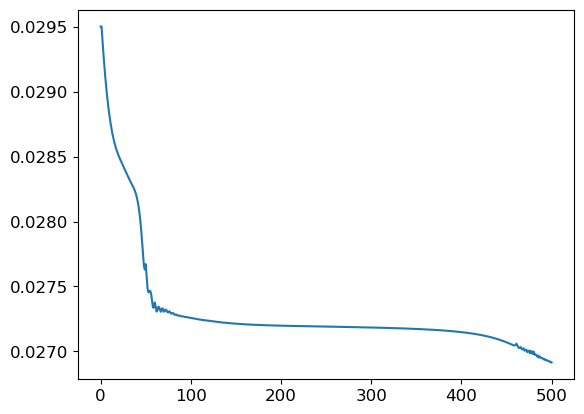

In [23]:
plt.plot(loss_tensor)

IndexError: list index out of range

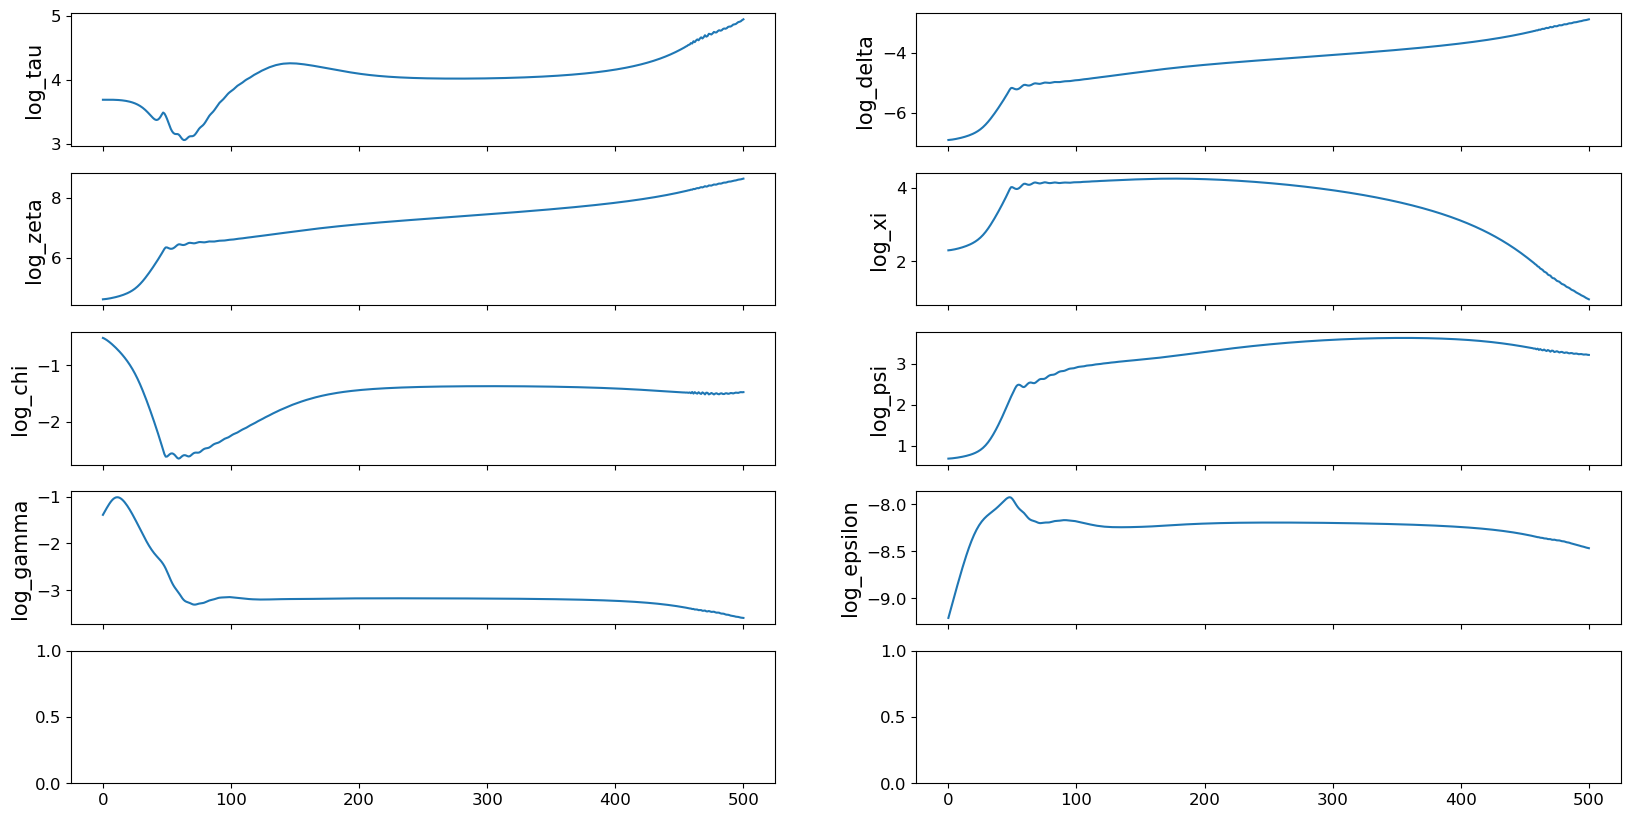

In [14]:
len(parameters_tensor.keys())

fig, ax = plt.subplots(int(np.floor(len(parameters_tensor.keys())/2)+1), 2, figsize = (20, 10), sharex=True)

for i in range(int(np.floor(len(parameters_tensor.keys())/2)+1)):
	for j in range(2):

		if i ==0 and j ==0:
			ax[i,j].plot(parameters_tensor[list(parameters_tensor.keys())[2*i+j]][:,np.argmax(parameters_tensor[list(parameters_tensor.keys())[0]][-1,:])])
			ax[i,j].set_ylabel(list(parameters_tensor.keys())[2*i+j])

		else:

			ax[i,j].plot(parameters_tensor[list(parameters_tensor.keys())[2*i+j]])
			ax[i,j].set_ylabel(list(parameters_tensor.keys())[2*i+j])

In [30]:
1/np.exp(-parameters_tensor["log_gamma"][-1])

array([2.1314948], dtype=float32)

In [31]:
np.exp(0.5)

1.6487212707001282

# Data setup

### Observations

In [30]:
Y_n_dense = tf.cast(tf.transpose(tf.sparse.to_dense(Y_n_sparse)), tf.int32)
Y_r_dense = tf.cast(tf.transpose(tf.sparse.to_dense(Y_r_sparse)), tf.int32)

Y_n_minus_r = Y_n_dense - Y_r_dense
Y_q_dense = tf.math.cumsum(Y_n_minus_r, axis = 0) - Y_n_dense

Y = 2*Y_n_dense + 3*Y_q_dense + 4*tf.math.cumsum(Y_r_dense, axis = 0)
Y = tf.one_hot(Y, tf.cast(5, tf.int32))

np.save("Data/FM/Y_FM_cumbria_SIQR.npy", Y[20:,...])

Y = tf.convert_to_tensor(np.load("Data/FM/Y_FM_cumbria_SIQR.npy"), dtype = tf.float32)

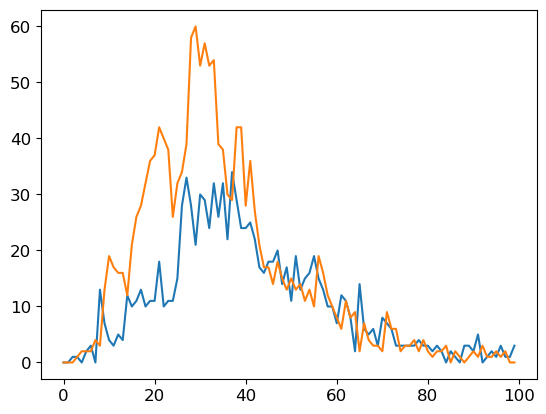

In [31]:
plt.plot(tf.reduce_sum(Y[:100,...,2], axis = -1))
plt.plot(tf.reduce_sum(Y[:100,...,3], axis = -1))
# plt.plot(tf.reduce_sum(Y[17:100,...,4], axis = -1))

### Covariates and locations

In [310]:
os.chdir("Scripts/")
%run -i model.py
%run -i CAL.py
os.chdir("../")

In [311]:
# locations  = tf.convert_to_tensor(geo_complete[["easting", "northing"]].values, dtype = tf.float32)
# covariates = tf.convert_to_tensor(geo_complete[["cattle" , "sheep"   ]].values, dtype = tf.float32)
# covariates = covariates/tf.reduce_max(covariates, axis = 0, keepdims=True)

# np.save("Data/FM/locations_FM_cumbria.npy", locations)
# np.save("Data/FM/covariates_FM_cumbria.npy", covariates)

In [313]:
locations  = tf.convert_to_tensor(np.load("Data/FM/locations_FM_cumbria.npy"), dtype = tf.float32)
covariates = tf.convert_to_tensor(np.load("Data/FM/covariates_FM_cumbria.npy"), dtype = tf.float32)

batch_size = 5000

parameters = {"prior_infection":tf.convert_to_tensor([1-0.001, 0.001, 0.0, 0.0], dtype = tf.float32),
	"log_zeta":tf.convert_to_tensor([np.log(1.5)], dtype = tf.float32),
	"log_xi":tf.convert_to_tensor([np.log(1.2)], dtype = tf.float32),
	"log_chi":tf.convert_to_tensor([np.log(1.3)], dtype = tf.float32),
	"log_psi":tf.convert_to_tensor([np.log(1.5)], dtype = tf.float32),
	"log_q_rate":tf.convert_to_tensor([np.log(0.8)], dtype = tf.float32),
	"log_r_rate":tf.convert_to_tensor([np.log(0.5)], dtype = tf.float32),
	"logit_prob_testing":logit(
		tf.convert_to_tensor([0.0, 0.5, 1.0, 1.0], dtype = tf.float32)),}

Y = tf.convert_to_tensor(np.load("Data/FM/Y_FM_cumbria.npy"), dtype = tf.float32)[20:,...]

FM_ibm = FM_SIQR(locations, covariates, batch_size)

log_likelihood = CAL_compiled(FM_ibm, parameters, Y)

In [314]:
log_likelihood

<tf.Tensor: shape=(), dtype=float32, numpy=nan>